# 2day 숙제 검사 (강사 교정) + 랜덤포레스트 + 캣부스트

와인 클래스 분류

In [1]:
%cd /home/alpaco/mys/oshLecture/sub_class

/home/alpaco/mys/oshLecture/sub_class


In [2]:
import pandas as pd

wine_data = pd.read_csv('./data/wine.csv')
display(wine_data.head())
display(wine_data.info())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


None

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


<Axes: >

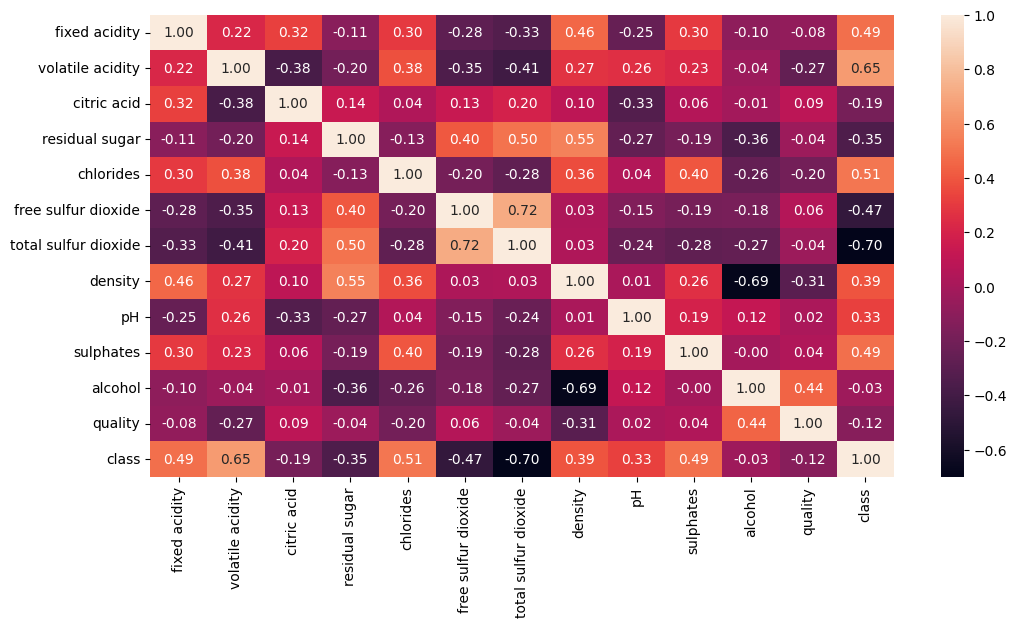

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

display(wine_data.corr())
plt.figure(figsize=(12,6))
sns.heatmap(data=wine_data.corr(), annot=True, fmt='.2f')

In [4]:
display(wine_data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [5]:
X = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates']]
y = wine_data['class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.preprocessing import RobustScaler

rbst = RobustScaler()
X_train_scailed = rbst.fit_transform(X_train)
X_valid_scailed = rbst.transform(X_valid)
display(X_train_scailed)
display(X_valid_scailed)

array([[ 0.        ,  2.11764706, -1.93333333, ...,  0.48523207,
         1.23809524,  0.94117647],
       [ 0.61538462,  1.76470588,  0.13333333, ...,  0.40084388,
         0.19047619,  0.17647059],
       [ 2.30769231,  2.58823529,  0.8       , ...,  0.35864979,
        -0.28571429,  0.35294118],
       ...,
       [ 1.30769231,  3.11764706, -1.93333333, ...,  0.06329114,
        -0.04761905,  0.41176471],
       [ 1.53846154,  0.52941176,  0.66666667, ...,  0.24050633,
        -0.38095238,  0.41176471],
       [ 0.07692308,  0.29411765, -1.06666667, ..., -0.2742616 ,
        -0.57142857, -0.47058824]])

array([[-0.38461538, -0.35294118, -0.4       , ...,  0.71308017,
        -0.28571429, -0.52941176],
       [ 2.30769231,  0.35294118,  1.06666667, ...,  0.20042194,
         0.0952381 ,  0.05882353],
       [ 0.38461538,  0.76470588, -1.13333333, ...,  0.21097046,
         0.04761905, -1.05882353],
       ...,
       [ 1.38461538,  0.88235294,  1.2       , ...,  0.69620253,
         0.42857143,  0.52941176],
       [ 0.69230769, -0.70588235,  0.06666667, ..., -0.02109705,
         0.38095238,  1.47058824],
       [-0.30769231, -0.35294118, -0.73333333, ...,  0.24050633,
        -1.19047619,  0.        ]])

## DecisionTreeClassifire

In [9]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def DT(trial):
    param = {
        'max_depth' : trial.suggest_int('max_depth', 1, 20),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 20)
    }
    
    # 학습 모델 생성
    model = DecisionTreeClassifier(**param)
    # 학습 진행
    model.fit(X_train_scailed, y_train) 
    # 예측
    y_pred = model.predict(X_valid_scailed)
    # 모델 성능 확인
    acc = accuracy_score(y_pred, y_valid)
    
    return acc

In [10]:
study = optuna.create_study(direction='maximize') #높아지는 값 방향으로.
study.optimize(DT, n_trials = 100)
study.best_params #베스트 파라미터 확인

[I 2024-07-02 13:31:00,247] A new study created in memory with name: no-name-0fe701b4-d957-4a4d-a421-1a9b6d2019e8
[I 2024-07-02 13:31:00,283] Trial 0 finished with value: 0.98 and parameters: {'max_depth': 15, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.98.
[I 2024-07-02 13:31:00,310] Trial 1 finished with value: 0.97 and parameters: {'max_depth': 12, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.98.
[I 2024-07-02 13:31:00,336] Trial 2 finished with value: 0.97 and parameters: {'max_depth': 12, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.98.
[I 2024-07-02 13:31:00,366] Trial 3 finished with value: 0.9838461538461538 and parameters: {'max_depth': 13, 'min_samples_leaf': 11}. Best is trial 3 with value: 0.9838461538461538.
[I 2024-07-02 13:31:00,398] Trial 4 finished with value: 0.9807692307692307 and parameters: {'max_depth': 20, 'min_samples_leaf': 10}. Best is trial 3 with value: 0.9838461538461538.
[I 2024-07-02 13:31:00,422] Trial 5 finished with value:

{'max_depth': 8, 'min_samples_leaf': 2}

In [11]:
model = DecisionTreeClassifier(**study.best_params)
model.fit(X_train_scailed, y_train)
y_pred = model.predict(X_valid_scailed)
score = accuracy_score(y_pred, y_valid)
print(score)

0.9861538461538462


In [13]:
# 의사결정에 기여를 많이한 정도
pd.DataFrame({'feature':X.columns , 'importance':model.feature_importances_})

,feature,importance
0,fixed acidity,0.020452
1,volatile acidity,0.012842
2,citric acid,0.003411
3,residual sugar,0.006435
4,chlorides,0.661359
5,free sulfur dioxide,0.001084
6,total sulfur dioxide,0.231922
7,density,0.032249
8,pH,0.008716
9,sulphates,0.021530


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# 정확도 계산
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.5f}")

# 정밀도 계산
precision = precision_score(y_valid, y_pred)
print(f"Precision: {precision:.2f}")

# 재현율 계산
recall = recall_score(y_valid, y_pred)
print(f"Recall: {recall:.2f}")


Accuracy: 0.98615
Precision: 0.99
Recall: 0.95


In [14]:
#결과 보기
import pandas as pd

# y_pred와 y_valid 값을 DataFrame으로 만들기
results = pd.DataFrame({'y_pred': y_pred, 'y_valid': y_valid})
results

,y_pred,y_valid
4135,0,0
1149,1,1
3680,0,0
5226,0,0
4087,0,0
...,...,...
1557,1,1
3096,0,0
577,1,1
3684,0,0


In [15]:
# y_pred와 y_valid 값을 enumerate()로 인덱스와 함께 출력하기
for i, (pred, valid) in enumerate(zip(y_pred, y_valid)):
    print(f"Index: {i}, y_pred: {pred}, y_valid: {valid}")


Index: 0, y_pred: 0, y_valid: 0
Index: 1, y_pred: 1, y_valid: 1
Index: 2, y_pred: 0, y_valid: 0
Index: 3, y_pred: 0, y_valid: 0
Index: 4, y_pred: 0, y_valid: 0
Index: 5, y_pred: 1, y_valid: 1
Index: 6, y_pred: 0, y_valid: 0
Index: 7, y_pred: 0, y_valid: 0
Index: 8, y_pred: 1, y_valid: 1
Index: 9, y_pred: 0, y_valid: 0
Index: 10, y_pred: 0, y_valid: 0
Index: 11, y_pred: 1, y_valid: 1
Index: 12, y_pred: 0, y_valid: 0
Index: 13, y_pred: 0, y_valid: 0
Index: 14, y_pred: 0, y_valid: 0
Index: 15, y_pred: 1, y_valid: 1
Index: 16, y_pred: 0, y_valid: 0
Index: 17, y_pred: 1, y_valid: 1
Index: 18, y_pred: 0, y_valid: 0
Index: 19, y_pred: 0, y_valid: 0
Index: 20, y_pred: 0, y_valid: 0
Index: 21, y_pred: 1, y_valid: 1
Index: 22, y_pred: 0, y_valid: 0
Index: 23, y_pred: 0, y_valid: 0
Index: 24, y_pred: 0, y_valid: 0
Index: 25, y_pred: 0, y_valid: 0
Index: 26, y_pred: 1, y_valid: 1
Index: 27, y_pred: 0, y_valid: 0
Index: 28, y_pred: 0, y_valid: 0
Index: 29, y_pred: 0, y_valid: 0
Index: 30, y_pred: 0

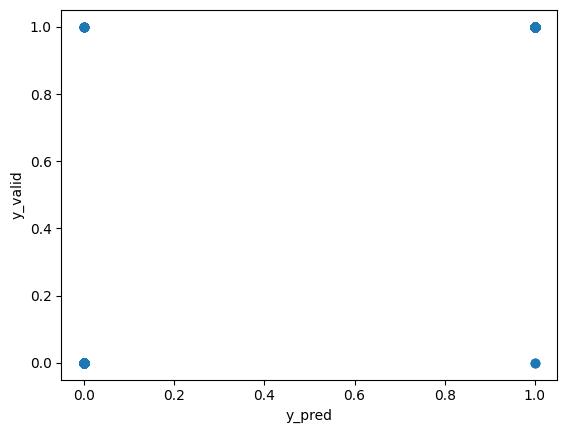

In [16]:
import matplotlib.pyplot as plt

# y_pred와 y_valid 값을 산점도로 표현하기
plt.scatter(y_pred, y_valid)
plt.xlabel('y_pred')
plt.ylabel('y_valid')
plt.show()

## RandomForestClassifire

In [31]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def RF(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
    }
    
    # 학습 모델 생성
    model = RandomForestClassifier(**param)
    # 학습 진행
    model.fit(X_train_scailed, y_train) 
    # 예측
    y_pred = model.predict(X_valid_scailed)
    # 모델 성능 확인
    acc = accuracy_score(y_pred, y_valid)
    
    return acc


In [32]:
study = optuna.create_study(direction='maximize') #높아지는 값 방향으로.
study.optimize(RF, n_trials = 100)
study.best_params #베스트 파라미터 확인

[I 2024-07-02 14:47:33,326] A new study created in memory with name: no-name-28e3592b-c9c3-4100-965e-01f8ae9a0797
[I 2024-07-02 14:47:33,799] Trial 0 finished with value: 0.9930769230769231 and parameters: {'n_estimators': 80, 'max_depth': 17, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.9930769230769231.
[I 2024-07-02 14:47:34,467] Trial 1 finished with value: 0.9938461538461538 and parameters: {'n_estimators': 144, 'max_depth': 6, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9938461538461538.
[I 2024-07-02 14:47:35,223] Trial 2 finished with value: 0.9961538461538462 and parameters: {'n_estimators': 125, 'max_depth': 16, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.9961538461538462.
[I 2024-07-02 14:47:36,280] Trial 3 finished with value: 0.9907692307692307 and parameters: {'n_estimators': 190, 'max_depth': 15, 'min_samples_leaf': 14}. Best is trial 2 with value: 0.9961538461538462.
[I 2024-07-02 14:47:37,060] Trial 4 finished with value: 0.994615384615384

{'n_estimators': 50, 'max_depth': 20, 'min_samples_leaf': 1}

In [33]:
model = RandomForestClassifier(**study.best_params)
model.fit(X_train_scailed, y_train)
y_pred = model.predict(X_valid_scailed)
score = accuracy_score(y_pred, y_valid)
print(score)

0.9961538461538462


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 정확도 계산
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.5f}")

# 정밀도 계산
precision = precision_score(y_valid, y_pred)
print(f"Precision: {precision:.2f}")

# 재현율 계산
recall = recall_score(y_valid, y_pred)
print(f"Recall: {recall:.2f}")

Accuracy: 0.99615
Precision: 0.99
Recall: 0.99


In [35]:
# y_pred와 y_valid 값을 enumerate()로 인덱스와 함께 출력하기
for i, (pred, valid) in enumerate(zip(y_pred, y_valid)):
    print(f"Index: {i}, y_pred: {pred}, y_valid: {valid}")

Index: 0, y_pred: 0, y_valid: 0
Index: 1, y_pred: 0, y_valid: 0
Index: 2, y_pred: 0, y_valid: 0
Index: 3, y_pred: 0, y_valid: 0
Index: 4, y_pred: 0, y_valid: 0
Index: 5, y_pred: 1, y_valid: 1
Index: 6, y_pred: 0, y_valid: 0
Index: 7, y_pred: 1, y_valid: 1
Index: 8, y_pred: 0, y_valid: 0
Index: 9, y_pred: 0, y_valid: 0
Index: 10, y_pred: 0, y_valid: 0
Index: 11, y_pred: 0, y_valid: 0
Index: 12, y_pred: 1, y_valid: 1
Index: 13, y_pred: 0, y_valid: 0
Index: 14, y_pred: 1, y_valid: 1
Index: 15, y_pred: 0, y_valid: 0
Index: 16, y_pred: 0, y_valid: 0
Index: 17, y_pred: 0, y_valid: 0
Index: 18, y_pred: 0, y_valid: 0
Index: 19, y_pred: 1, y_valid: 1
Index: 20, y_pred: 0, y_valid: 0
Index: 21, y_pred: 0, y_valid: 0
Index: 22, y_pred: 1, y_valid: 1
Index: 23, y_pred: 0, y_valid: 0
Index: 24, y_pred: 1, y_valid: 1
Index: 25, y_pred: 0, y_valid: 0
Index: 26, y_pred: 0, y_valid: 0
Index: 27, y_pred: 0, y_valid: 0
Index: 28, y_pred: 1, y_valid: 1
Index: 29, y_pred: 0, y_valid: 1
Index: 30, y_pred: 1

# 3day 숙제

## 타이타닉 생존자 맞추기

범주형 데이터가 있으니 겟더미 함수를 활용해서 잘 분류해보자

In [76]:
%cd /home/alpaco/mys/oshLecture/sub_class

/home/alpaco/mys/oshLecture/sub_class


### 데이터 확인

In [77]:
'''
    1. PassengerId : 각 승객의 고유 번호    X
    2. Survived : 생존 여부(종속 변수)  target
        0 = 사망
        1 = 생존
    3. Pclass : 객실 등급 - 승객의 사회적, 경제적 지위  O
        1 = Upper
        2 = Middle
        3 = Lower
    4. Name : 이름  X
    5. Sex : 성별   O
    6. Age : 나이   O
    7. SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수   O
    8. Parch : 동반한 Parent(부모) Child(자식)의 수 O
    9. Ticket : 티켓의 고유넘버 X
    10. Fare : 티켓의 요금  O
    11. Cabin : 객실 번호   X
    12. Embarked : 승선한 항    O
        C = Cherbourg
        Q = Queenstown
        S = Southampton
    '''

# X = [['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
# y = ['Survived']

'\n    1. PassengerId : 각 승객의 고유 번호    X\n    2. Survived : 생존 여부(종속 변수)  target\n        0 = 사망\n        1 = 생존\n    3. Pclass : 객실 등급 - 승객의 사회적, 경제적 지위  O\n        1 = Upper\n        2 = Middle\n        3 = Lower\n    4. Name : 이름  X\n    5. Sex : 성별   O\n    6. Age : 나이   O\n    7. SibSp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수   O\n    8. Parch : 동반한 Parent(부모) Child(자식)의 수 O\n    9. Ticket : 티켓의 고유넘버 X\n    10. Fare : 티켓의 요금  O\n    11. Cabin : 객실 번호   X\n    12. Embarked : 승선한 항    O\n        C = Cherbourg\n        Q = Queenstown\n        S = Southampton\n    '

In [78]:
import pandas as pd

titanic = pd.read_csv('./data/titanic.csv')
display(titanic.head())
display(titanic.info())
display(titanic.shape)
display(titanic.columns)
display(titanic.isna().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

(891, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 데이터 전처리

In [79]:
# 성별 값은 문자열 타입이기 때문에 숫자 여자:0 남자:1로 변환
titanic.Sex = titanic.Sex.map({'female':0, 'male':1})

In [80]:
# 이름에서 호칭 추출하기
titanic['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.', expand=False)
titanic.Title

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [81]:
# 호칭별 중앙 나이 계산하기
title_age_median = titanic.groupby('Title')['Age'].median().to_dict()
title_age_median

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 46.5,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 3.5,
 'Miss': 21.0,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 30.0,
 'Mrs': 35.0,
 'Ms': 28.0,
 'Rev': 46.5,
 'Sir': 49.0}

In [82]:
# 평균 나이를 정수형으로 변경하기
title_age_median = {k: int(v) for k, v in title_age_median.items()}
title_age_median

{'Capt': 70,
 'Col': 58,
 'Countess': 33,
 'Don': 40,
 'Dr': 46,
 'Jonkheer': 38,
 'Lady': 48,
 'Major': 48,
 'Master': 3,
 'Miss': 21,
 'Mlle': 24,
 'Mme': 24,
 'Mr': 30,
 'Mrs': 35,
 'Ms': 28,
 'Rev': 46,
 'Sir': 49}

In [83]:
# 결측치 채우기
titanic['Age'] = titanic['Age'].fillna(titanic['Title'].map(title_age_median))
titanic['Age'] = titanic['Age'].astype(int) # Age값 정수로 전환
# 결과 확인
print(titanic[['Name', 'Title', 'Age']].head(50))

                                                 Name   Title  Age
0                             Braund, Mr. Owen Harris      Mr   22
1   Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs   38
2                              Heikkinen, Miss. Laina    Miss   26
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs   35
4                            Allen, Mr. William Henry      Mr   35
5                                    Moran, Mr. James      Mr   30
6                             McCarthy, Mr. Timothy J      Mr   54
7                      Palsson, Master. Gosta Leonard  Master    2
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs   27
9                 Nasser, Mrs. Nicholas (Adele Achem)     Mrs   14
10                    Sandstrom, Miss. Marguerite Rut    Miss    4
11                           Bonnell, Miss. Elizabeth    Miss   58
12                     Saundercock, Mr. William Henry      Mr   20
13                        Andersson, Mr. Anders Johan      Mr 

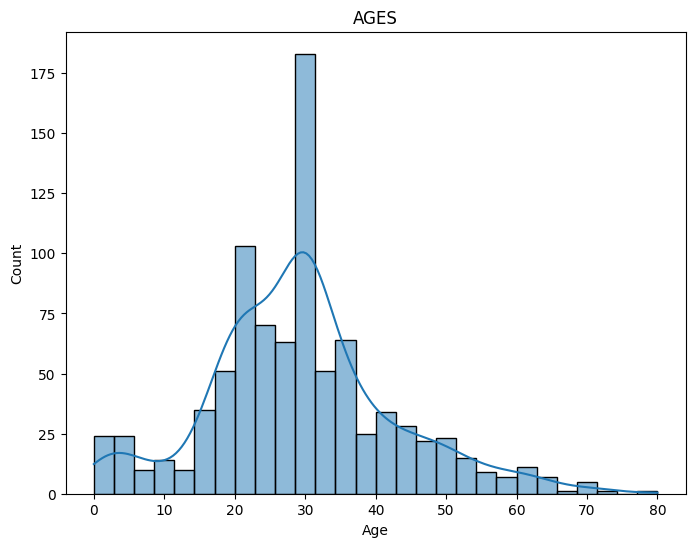

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 나이 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(titanic['Age'], kde=True)
plt.title('AGES')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [85]:
titanic['Fare'] = titanic['Fare'].astype(int) # 티켓 요금 값 정수로 전환

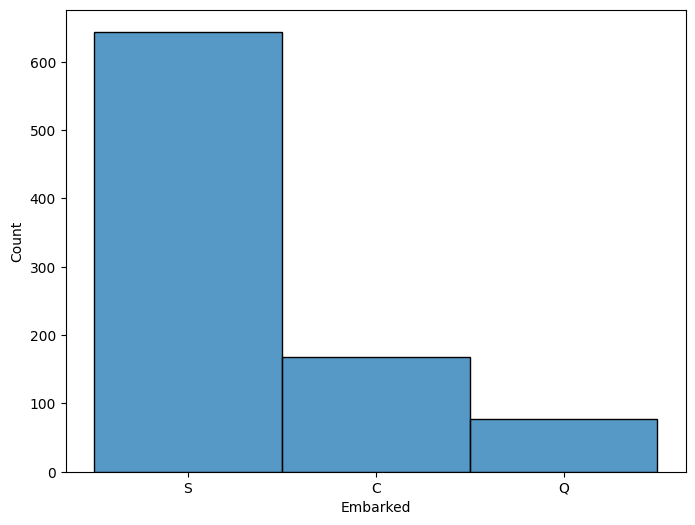

In [86]:
# 승선항 시각화
plt.figure(figsize=(8, 6))
sns.histplot(titanic['Embarked'])
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

In [87]:
titanic.Embarked.fillna('S', inplace=True)
 # 승선항이 필요할까? 
 # 탑승 지역에 따라 탑승객의 성격이 다를 수 있기 때문에 가능성이 있다고 생각된다.
 # S항 승선률이 높으니 S로 채우자.

/tmp/ipykernel_85435/907773087.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.Embarked.fillna('S', inplace=True)


In [88]:
# get_dummy 함수는 데이터를 원-핫 인코딩 해주는 
# embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked', drop_first=True)
# embarked_dummies
# 뒤에 붙여줌
# titanic = pd.concat([titanic, embarked_dummies], axis=1)

'''
위 코드는 Embarked열을 이용해 Embarked_S, Embarked_C, Embarked_Q 파생열을 생성한다.
생성 후 각 컬럼에 해당하는 값에 1을 둔다.
drop_first를 하면 제일 앞에 있는 Ebarked_S 열을 삭제한다.
이유는 다중 공선성(multicollinearity) 문제를 방지해준다고 한다.
그리고 기존 타이타닉 데이터셋에 해당 열을 추가하는 코드다.
하지만 난 정통적인 방법으로 해결해보겠다.
'''
titanic.Embarked = titanic.Embarked.map({'S':0, 'C':1, 'Q':2})

In [94]:
display(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7,NaN,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71,C85,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7,NaN,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,C123,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8,NaN,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13,NaN,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30,B42,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21,1,2,W./C. 6607,23,NaN,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30,C148,1,Mr


### 상관 관계 생각해보기

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.0,-0.338481,-0.543351,-0.078791,-0.035322,0.081629,0.257482,0.106811


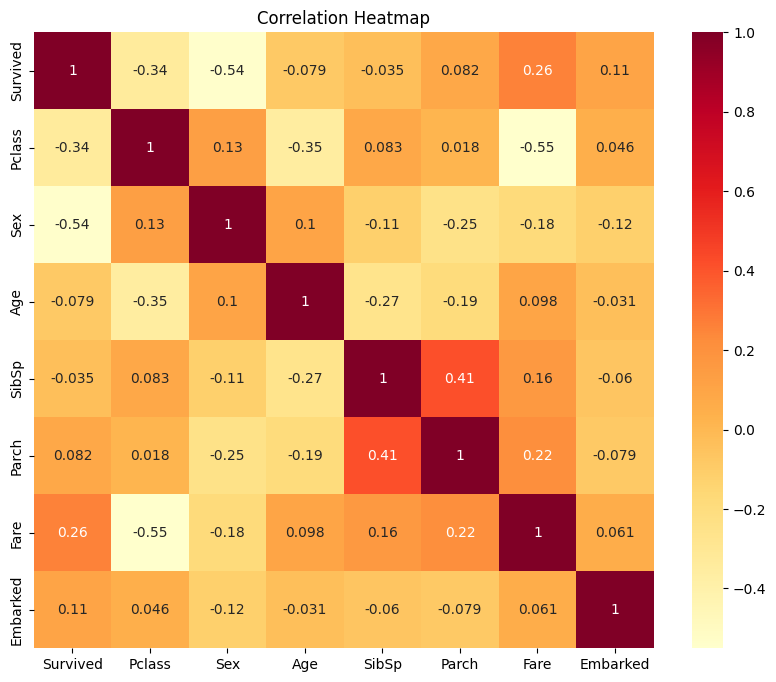

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int64
 7   Embarked  891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


None

In [131]:
# 나는 직감으로 상관관계를 추려냈다. 그리고 상관관계를 corr로  한번 더 확인해봤다.

# 상관계수 행렬 계산
corr_matrix = titanic[['Survived','Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']].corr()
display(corr_matrix[:1][:])

# 상관관계 히트맵 그리기
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.show()

display(titanic[['Survived','Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']].info())

### X, y 나누기

In [112]:
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']]
y = titanic['Survived']
display(X)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22,1,0,7,0
1,1,0,38,1,0,71,1
2,3,0,26,0,0,7,0
3,1,0,35,1,0,53,0
4,3,1,35,0,0,8,0
...,...,...,...,...,...,...,...
886,2,1,27,0,0,13,0
887,1,0,19,0,0,30,0
888,3,0,21,1,2,23,0
889,1,1,26,0,0,30,1


### Train, Valid 데이터 나누기 방법 -train_test_split

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

### 리스케일링

In [115]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_scailed= rs.fit_transform(X_train)
X_valid_scailed= rs.fit_transform(X_valid)


### RandomForestClassifire

In [136]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def RF(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
    }
    
    # 학습 모델 생성
    model = RandomForestClassifier(**param)
    # 학습 진행
    model.fit(X_train_scailed, y_train) 
    # 예측
    y_pred = model.predict(X_valid_scailed)
    # 모델 성능 확인
    acc = accuracy_score(y_pred, y_valid)
    
    return acc


In [137]:
study = optuna.create_study(direction='maximize') #높아지는 값 방향으로.
study.optimize(RF, n_trials = 100)
study.best_params #베스트 파라미터 확인

[I 2024-07-02 20:41:52,135] A new study created in memory with name: no-name-59b5d658-f4cc-4629-9cc8-feef6654d3dc
[I 2024-07-02 20:41:52,261] Trial 0 finished with value: 0.8212290502793296 and parameters: {'n_estimators': 80, 'max_depth': 20, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8212290502793296.
[I 2024-07-02 20:41:52,371] Trial 1 finished with value: 0.8100558659217877 and parameters: {'n_estimators': 81, 'max_depth': 6, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.8212290502793296.
[I 2024-07-02 20:41:52,405] Trial 2 finished with value: 0.8268156424581006 and parameters: {'n_estimators': 22, 'max_depth': 5, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.8268156424581006.
[I 2024-07-02 20:41:52,659] Trial 3 finished with value: 0.8156424581005587 and parameters: {'n_estimators': 191, 'max_depth': 9, 'min_samples_leaf': 16}. Best is trial 2 with value: 0.8268156424581006.
[I 2024-07-02 20:41:52,788] Trial 4 finished with value: 0.8156424581005587 an

{'n_estimators': 173, 'max_depth': 4, 'min_samples_leaf': 3}

In [138]:
model = RandomForestClassifier(**study.best_params)
model.fit(X_train_scailed, y_train)
y_pred = model.predict(X_valid_scailed)
score = accuracy_score(y_pred, y_valid)
print(score)

0.8156424581005587


In [139]:
corr_matrix = titanic[['Survived','Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']].corr()
display(corr_matrix[:1][:])

# 의사결정에 기여를 많이한 정도
real_corr = pd.DataFrame({'feature':X.columns, 'importance':model.feature_importances_})
real_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.0,-0.338481,-0.543351,-0.078791,-0.035322,0.081629,0.257482,0.106811


,feature,importance
0,Pclass,0.172288
1,Sex,0.433726
2,Age,0.095953
3,SibSp,0.043418
4,Parch,0.035678
5,Fare,0.179944
6,Embarked,0.038993


#